## Using SQL with Pandas
- Creating a connection
- create a query
### pandas.read_sql_query("query","connection")


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
conn = sqlite3.connect("factbook.db")
##structure
# select {what} from {table}...
query = "select * from sqlite_master where type='table';"
pd.read_sql_query(query, conn)
q2 = "select * from facts limit 5;"
# print the extracted dataframe
pd.read_sql_query(q2,conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Query the max and min populations

- In this section we investigate the variation in population.
- We extract the minimum and maximum population from the population column

In [22]:
pop_min= "select min(population)as lowest_population from facts"
pop_max = "select max(population) highest_population from facts"

pop_gr_min = "select min(population_growth) from facts"
pop_gr_max = "select max(population_growth) from facts"

#display the lowest and highest population values
highest_pop = pd.read_sql_query(pop_max,conn)
lowest_pop = pd.read_sql_query(pop_min,conn)
print("highest: %s \n\nlowest:%s" %(highest_pop,lowest_pop))


min_pop_country = "select * from facts where population = (select min(population) from facts)"
max_pop_country = "select * from facts where population = (select max(population) from facts)"
print("\n\nleast population country")
pd.read_sql_query(min_pop_country,conn)

highest:    highest_population
0          7256490011 

lowest:   lowest_population
0                  0


least population country


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [23]:
print("\n\nHighest population country")
pd.read_sql_query(max_pop_country,conn)



Highest population country


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


## Inferences
- Our data has an entry of over 7.2 billion population and 0 population in another. 
#### Print the entire row, we find:
- The max population 7256490011 is actually the population of the world
- The 0 population is that of antarctica, obviously
#### We need to eliminate these two entries and find out the most and least populated country

In [46]:
min_pop_country = "select * from facts where population = (select min(population) from facts)"
max_pop_country = "select * from facts where population = (select max(population) from facts)"
q= "select * from facts where population !=(select min(population) from facts) and population != (select max(population) from facts)"
world_data = pd.read_sql_query(q,conn)
#remove  unnecessary columns
world_data= world_data.drop(["created_at","updated_at"], axis=1)
#highest countries and lowest population
#just pick afew columns
highest_pop = world_data[world_data["population"] == world_data["population"].max()][["name","population","area"]]
lowest_pop = world_data[world_data["population"] == world_data["population"].min()][["name","population","area"]]
highest_pop

,name,population,area
36,China,1367485388,9596960.0


In [47]:
lowest_pop

,name,population,area
229,Pitcairn Islands,48,47.0


## Histogram: population, Popn growth rate, birth_rate, death rate
- We use a histogram to visualize the frequencies of particular population ranges, birth rates, growth rates and death rates

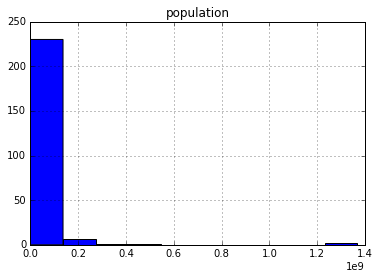

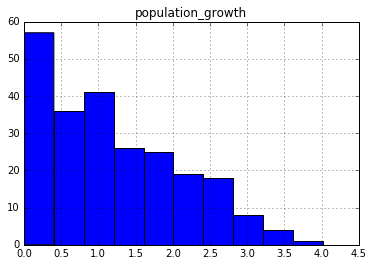

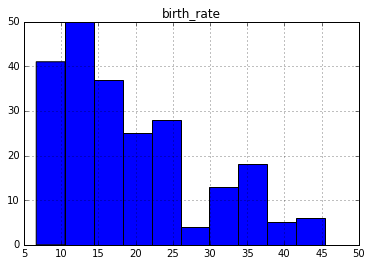

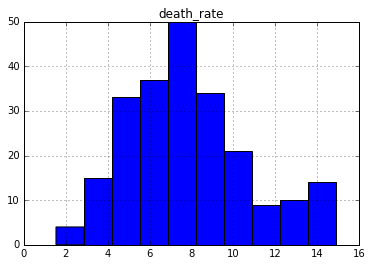

In [36]:
query = "select population, population_growth, birth_rate, death_rate from facts where population != (select min(population) from facts) and population !=(select max(population) from facts)"
country_data = pd.read_sql_query(query, conn)
country_data.hist("population")
plt.show()
country_data.hist("population_growth")
plt.show()
country_data.hist("birth_rate")
plt.show()
country_data.hist("death_rate")
plt.show()

## Population density

- population density is the ratio of the population to the land. It shows how the population how much of a population can an area accomodate. It can be used as the basis to control birth rates for instance.

          name  population_density
203  Greenland            0.026653
                      name  water_to_land
21  Bosnia and Herzegovina         5118.7


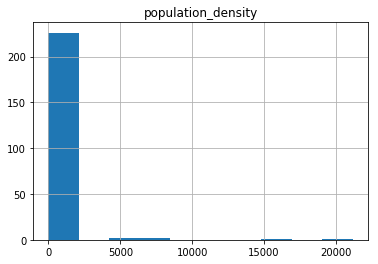

In [60]:
query = "select name, population, population_growth, birth_rate, death_rate,area_land,area_water from facts where population != (select min(population) from facts) and population !=(select max(population) from facts)"
country_data = pd.read_sql_query(query, conn)
country_data["population_density"] = country_data["population"] / country_data["area_land"]

#The data has some infinite values
#country_data.replace([np.inf,-np.inf],np.NaN).dropna(subset = ["population_density"],how="all")
with pd.option_context('mode.use_inf_as_null',True):
    country_data["population_density"].fillna(0)
    max_den = country_data["population_density"]== country_data["population_density"].max()
    min_den = country_data["population_density"]== country_data["population_density"].min()

    print(country_data[min_den][["name","population_density"]])
    country_data.hist("population_density")

    
#water to land ration
country_data["water_to_land"] = country_data["area_land"]/country_data["area_water"]
with pd.option_context('mode.use_inf_as_null',True):
    country_data["water_to_land"].max()
    max_ratio = country_data["water_to_land"]== country_data["water_to_land"].max()
    print(country_data[max_ratio][["name","water_to_land"]])

- Bosnia and Herzegovina has the highest ratio of land to water
- The population densities are close to those on https://simple.wikipedia.org/wiki/List_of_countries_by_population_density  with greenland having population density of 0.026653